# SO(5) Richardson Gaudin

First, let's import the functions and packages we need we need

In [1]:
from solve_rg_eqs import solve_rgEqs, solve_rgEqs_2, G_to_g
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Setting physical parameters. 

Note that $g$ is not $GL$, but instead
$g = \frac{G}{1-G\sum_k k}$. At $G_c = \frac{1}{\sum_k k}$, $g$ becomes singular. So, around this point I switch to using $1/g$ in the code.

Due to assumptions in the code, I currently require Nup and Ndown to be even numbers.

In [2]:
L = 4 # Very small system, just an illustration
Nup = 4
Ndown = 4

N = Nup + Ndown

dims = (L, Nup, Ndown)

G_final = 1.5*(2/(np.pi*L)) # 1.5 times critical coupling?
# G_final = -0.5
k = np.arange(1, 2*L+1, 2)*0.5*np.pi/L

Setting numerical parameters. If the following things don't work, try decreasing ``dg`` (which will change the other parameters as well). If you want more (or less) points in the output, decrease (increase) the value of ``skip``, which sets how often we remove artificial imaginary parts and save values to output (i.e. skip ``skip`` values of ``g`` before doing this).

In [3]:
dg = 0.01/N # step size of g. Scaling with N instead of L because increasing N increases difficulty
g0 = .01*dg # initial value of g
imk = dg # scale of the imaginary parts added to k
imv = .01*g0 # scale of the imaginary parts used in the initial guess

if N/(4*L) <= 0.5:
    skip = 4*L # number of steps between times we remove imaginary parts
else:
    skip = 10*L 

Solving the Richardson-Gaudin equations.

Watch out, this could take a while. It will increment ``g`` from ``g0`` until
it has trouble converging, at which point it switches to incrementing ``1/g``.

Also, ignore things that look like error messages. 

## Wait for the evaluation to complete!
## The [*]: to the left of this should turn into a number [x]:

In [4]:
if G_final > 1./np.sum(k):
    # Need to use different code to pass the critical point
    output_df = solve_rgEqs_2(dims, G_final, k, dg=dg, g0=g0, imscale_k=imk,
                              imscale_v=imv, skip=skip)
else:
    # Can just increment g
    output_df = solve_rgEqs(dims, G_final, k, dg=dg, g0=g0, imscale_k=imk,
                            imscale_v=imv, skip=1)

Initial guesses:
[0.39269715+0.00125j    0.39269715+0.00124999j 1.1780799 -0.00124996j
 1.1780799 -0.00125j   ]
[0.39269844+0.0012496j  0.39269844+0.0012504j  1.17809146-0.00125079j
 1.17809146-0.00124919j]
Incrementing from 1.25e-05 to 1.4323944878270585
Bootstrapping from 4 to 8 fermions

Now using 4 fermions

Bad initial guess. Trying with noise.
g = 1.25e-05, er = 0.0018202394825597367
1th try at g = 1.25e-05
Smallest error from last set: 0.0018202394825597367
Noise ranges from -1.3112025745220723e-07 to 2.7265625536863065e-08
3th try at g = 1.25e-05
Smallest error from last set: 0.001931271688388418
Noise ranges from -8.477977332123758e-08 to 5.818639653910729e-08
Error with 4 fermions: 3.5894110215703177e-11

Now using 8 fermions

Bad initial guess. Trying with noise.
g = 1.25e-05, er = 0.0027871615575147577
1th try at g = 1.25e-05
Smallest error from last set: 0.0027871615575147577
Noise ranges from -1.2043796165803502e-07 to 7.736848050131336e-08
3th try at g = 1.25e-05
Smalles

Changing dq from 0.002 to 0.004
q = 1.8436096474066646
Changing dq from 0.004 to 0.008
q = 1.8356096474066645
Changing dq from 0.008 to 0.016
q = 1.8196096474066645
q = 1.8036096474066645
q = 1.7876096474066645
q = 1.7716096474066645
q = 1.7556096474066645
q = 1.7396096474066645
q = 1.7236096474066644
Removing im(k) at q = 1.7236096474066644
q = 1.7076096474066644
q = 1.6916096474066644
q = 1.6756096474066644
q = 1.6596096474066644
q = 1.6436096474066644
q = 1.6276096474066644
q = 1.6116096474066643
q = 1.5956096474066643
q = 1.5796096474066643
q = 1.5636096474066643
q = 1.5476096474066643
q = 1.5316096474066643
q = 1.5156096474066643
q = 1.4996096474066642
q = 1.4836096474066642
q = 1.4676096474066642
Removing im(k) at q = 1.4676096474066642
q = 1.4516096474066642
q = 1.4356096474066642
q = 1.4196096474066642
q = 1.4036096474066642
q = 1.3876096474066641
q = 1.3716096474066641
q = 1.3556096474066641
q = 1.339609647406664
q = 1.323609647406664
q = 1.307609647406664
q = 1.29160964740666

OK, that took a while. If there's a big pink error message about division by zero, ignore it for now.

If you see an error that says something about child processes, I suggest restarting the kernel and rerunning.

Let's look at the output, stored in a Pandas DataFrame.

To store it as a CSV, uncomment lines 2 and 3 below and input a filename when prompted. Line 4 is an example of how to load the data (or other CSV data) into a Pandas dataframe.

In [5]:
print(output_df)
# filename = input('Name to save file to: ')
# output_df.to_csv(filename)
# new_df = pd.load_csv(filename)

            g         G   Re(e_0)       Im(e_0)  Re(omega_0)  Im(omega_0)  \
0    0.147512  0.076556  0.378723 -1.302106e-18     0.360657    -0.009732   
1    0.287513  0.102445  0.381857  3.366112e-10     0.339870    -0.015235   
2    0.300245  0.104017  0.386245  1.839048e-02     0.338804    -0.015546   
3    0.315397  0.105778  0.374630  2.823657e-02     0.337754    -0.015895   
4    0.332159  0.107599  0.361443  3.330801e-02     0.336846    -0.016289   
5    0.350802  0.109484  0.345058  3.641128e-02     0.336034    -0.016844   
6    0.371663  0.111436  0.326613  4.262690e-02     0.334977    -0.017890   
7    0.395162  0.113459  0.310991  4.949009e-02     0.332689    -0.020083   
8    0.421832  0.115556  0.296303  5.475123e-02     0.327812    -0.023875   
9    0.452364  0.117733  0.281593  5.860368e-02     0.319832    -0.028719   
10   0.487660  0.119993  0.266525  6.125601e-02     0.309152    -0.033658   
11   0.528930  0.122342  0.250934  6.282843e-02     0.296281    -0.038063   

# Using the results

## Pairons

Let's make a plot of the pairons. First, we need to get the results from the DataFrame. In output_df, the results for each pairon's real and imaginary part is stored as a row, with a name like ``Re(omega_0)``. To get one row, we can do as follows:

In [6]:
output_df['Re(e_0)']

0     0.378723
1     0.381857
2     0.386245
3     0.374630
4     0.361443
5     0.345058
6     0.326613
7     0.310991
8     0.296303
9     0.281593
10    0.266525
11    0.250934
12    0.233990
13    0.206482
14    0.176863
15    0.144857
16    0.110197
17    0.072625
18    0.031920
19   -0.012086
20   -0.059487
21   -0.110310
22   -0.164519
23   -0.222037
24   -0.282747
25   -0.346485
26   -0.413033
27   -0.476068
Name: Re(e_0), dtype: float64

I don't want to do this for every column I'm interested in. Let's make lists of these column names:

In [7]:
real_e_index = ['Re(e_{})'.format(i) for i in range(Nup)]
im_e_index = ['Im(e_{})'.format(i) for i in range(Nup)]
real_w_index = ['Re(omega_{})'.format(i) for i in range(Ndown)]
im_w_index = ['Im(omega_{})'.format(i) for i in range(Ndown)]

# Is this the thing we wanted?
print(real_e_index)
print(im_e_index)
print(real_w_index)
print(im_w_index)

['Re(e_0)', 'Re(e_1)', 'Re(e_2)', 'Re(e_3)']
['Im(e_0)', 'Im(e_1)', 'Im(e_2)', 'Im(e_3)']
['Re(omega_0)', 'Re(omega_1)', 'Re(omega_2)', 'Re(omega_3)']
['Im(omega_0)', 'Im(omega_1)', 'Im(omega_2)', 'Im(omega_3)']


Let's make a plot with labels and titles and legends!

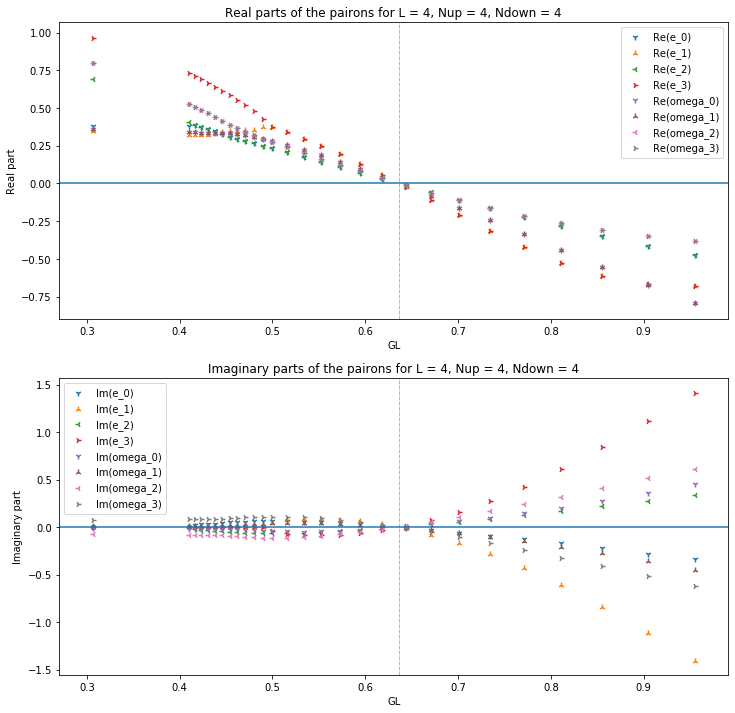

In [8]:
plt.figure(figsize=(12,12)) # Making a bigger figure for the plots

markers = ['1', '2', '3', '4', 'x', '+', '.', 'v', '^'] 
# using different shapes for the markers so we can see stacked results

plt.subplot(2,1,1) # Making 2 subplots, first for real parts
for i, ind in enumerate(real_e_index):
    # Plotting like before, but now assigning labels for the legend
    # Luckily, our rownames are decent labels already
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 
# Doing the same for real parts of omega
for i, ind in enumerate(real_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 

# Let's plot a horizontal line at 0
plt.axhline(0)

# Let's make a thin, vertical, dotted/dashed, magenta line at G_c
g_c = L/np.sum(k)
plt.axvline(g_c, ls='-.', color='magenta', linewidth=.5)
    
# Making axes labels
plt.title('Real parts of the pairons for L = {}, Nup = {}, Ndown = {}'.format(L, Nup, Ndown))
plt.xlabel('GL')
plt.ylabel('Real part')
plt.legend() 
    
plt.subplot(2,1,2) # Now moving to a second subplot
for i, ind in enumerate(im_e_index):
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 
for i, ind in enumerate(im_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 

plt.axhline(0)
plt.axvline(g_c, ls='-.', color='magenta', linewidth=.5)    
    
plt.title('Imaginary parts of the pairons for L = {}, Nup = {}, Ndown = {}'.format(L, Nup, Ndown))
plt.xlabel('GL')
plt.ylabel('Imaginary part')
plt.legend()

plt.show()

We can change the limits of the axes to get a closer look at the behavior around G_c:

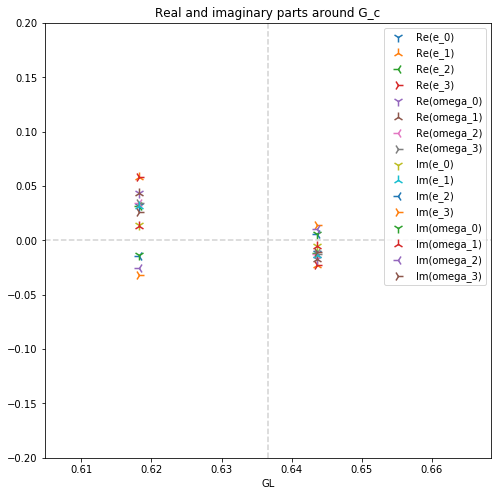

In [9]:
plt.figure(figsize=(8,8))

plt.axvline(g_c, ls = '--', color='lightgray')
plt.axhline(0, ls = '--', color='lightgray')

for i, ind in enumerate(real_e_index):
    # s is the size of the marks (not sure the units)
    # Let's make them bigger!
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
for i, ind in enumerate(real_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
for i, ind in enumerate(im_e_index):
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
for i, ind in enumerate(im_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
    
plt.xlim(0.95*g_c, 1.05*g_c) # Looking within 5% of g_c
plt.ylim(-0.2, 0.2) # You might need to change these values

plt.legend()
plt.xlabel('GL')

plt.title('Real and imaginary parts around G_c')
plt.show()

## Energy
We can also plot energy (and other things). Let's get the energy and derivatives from the output DataFrame.

Again, if there is a division by zero error, ignore it for now. This occurs if we are taking the derivative of something too close to vertical.

In [10]:
Es = output_df['energy']
Gs = output_df['G']
# Rescaling by appropriate factors of L
es = Es/L
gs = Gs*L # different than g in previous plot

print('Taking 1st derivative')
de = np.gradient(es, gs) # derivative de/dg
print('Taking 2nd derivative')
d2e = np.gradient(de, gs) # second derivative
print('Taking 3rd derivative')
d3e = np.gradient(d2e, gs) # third

Taking 1st derivative
Taking 2nd derivative
Taking 3rd derivative


Now, let's make a 2-by-2 plot with the energy and derivatives.

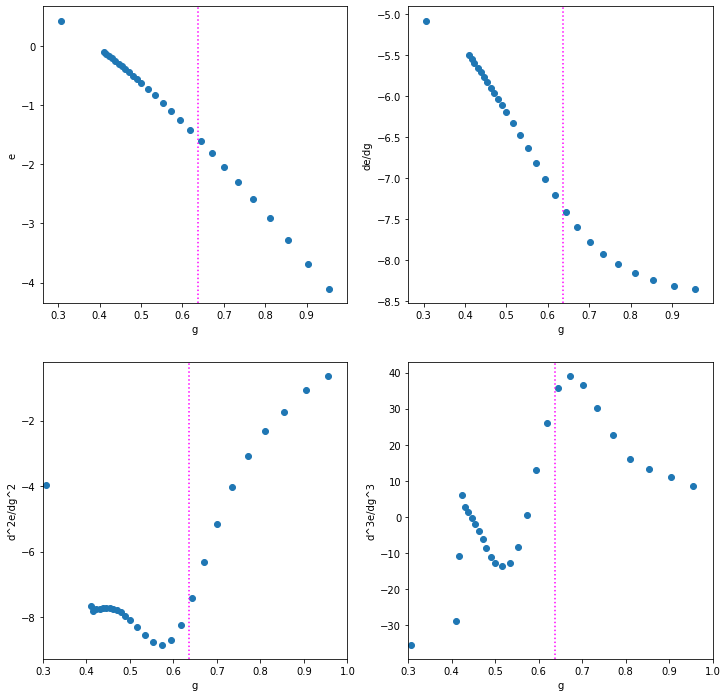

In [11]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.scatter(gs, es)
plt.xlabel('g')
plt.ylabel('e')
plt.axvline(g_c, ls=':', color='magenta')

plt.subplot(2, 2, 2)
plt.scatter(gs, de)
plt.xlabel('g')
plt.ylabel('de/dg')
plt.axvline(g_c, ls=':', color='magenta')


plt.subplot(2, 2, 3)
plt.scatter(gs, d2e)
plt.xlabel('g')
plt.ylabel('d^2e/dg^2')
plt.axvline(g_c, ls=':', color='magenta')
plt.xlim(0.3, 1.0)


plt.subplot(2, 2, 4)
plt.scatter(gs, d3e)
plt.xlabel('g')
plt.ylabel('d^3e/dg^3')
plt.axvline(g_c, ls=':', color='magenta')
plt.xlim(0.3, 1.0) 
# Behavior around G=0 is weird but this is due to truncation and inaccuracies in the solution around that point

plt.show()

## Momentum Distribution

Let's look at the momentum distribution within $5\%$ of my prediction for $G_c$.

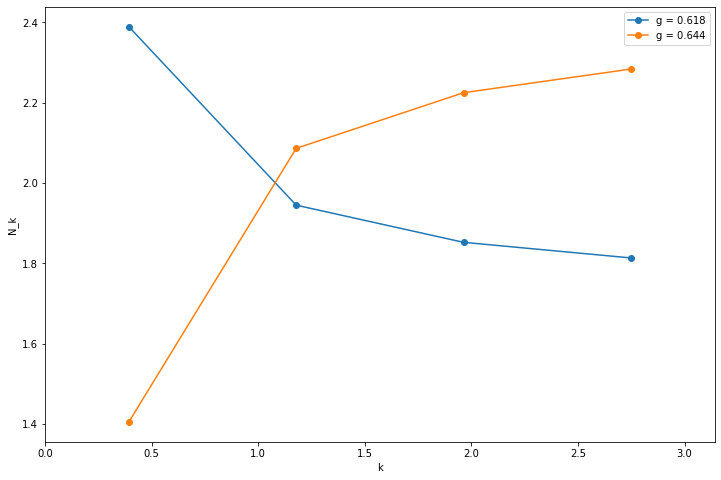

In [12]:
N_inds = ['N_{}'.format(i) for i in range(L)]

plt.figure(figsize=(12, 8))

for i, G in enumerate(Gs):
    if 0.95 < G*L/g_c < 1.05: # Only selecting within 2% of G_c
        plt.plot(k, output_df[N_inds].iloc[i], 
                label='g = {}'.format(np.round(G*L, 3)), # rounding the label to 3 decimal places
                 marker='o') # Putting a dot at each data point
plt.xlabel('k')
plt.ylabel('N_k')
plt.legend()
plt.xlim(0, np.pi)
plt.show()

At precisely the critical coupling, it seems like Jorge's prediction of perfectly flat distribution is true, just not at the coupling he predicted.

To get a better sense of overall behavior, we can plot at a wider range of coupling. To make sure we don't end up with too many lines, I'll only plot once every 15 datapoints.

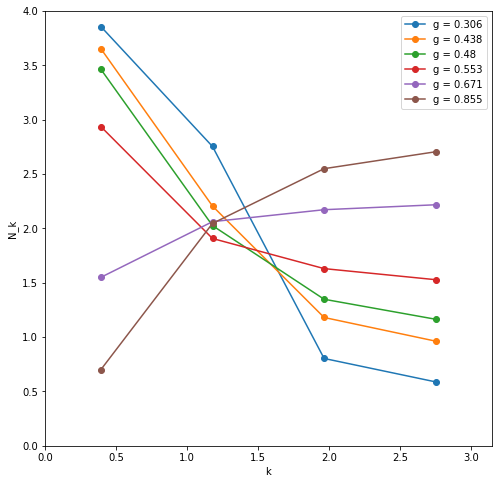

In [13]:
plt.figure(figsize=(8,8))        

for i, G in enumerate(Gs):
    if i%5 == 0: # Only using indices that are multiples of 5
        plt.plot(k, output_df[N_inds].iloc[i], 
                label='g = {}'.format(np.round(G*L, 3)), # rounding the label to 3 decimal places
                 marker='o') # Putting a dot at each data point

plt.xlabel('k')
plt.ylabel('N_k')
plt.legend()
plt.xlim(0, np.pi)
plt.ylim(0, 4) # Limits on values of N_k = n_{k up} + n_{k down} + n_{-k up} + n_{-k down}
plt.show()

# Checking results with exact diagonalization

To use my exact-diagonalization code, you will need the [Quspin package](https://weinbe58.github.io/QuSpin/).
First, we import functions from my exact-diagonalization code and create a basis for ``Nup`` spin up and ``Ndown``
spin down fermions on a 1-d lattice with ``2L`` sites (since ``L`` counts only positive $k$):

In [14]:
from exact_diag import ham_op_2, find_nk, form_basis, casimir_dict, iom_dict, quantum_operator
basis = form_basis(2*L, Nup, Ndown)

Now, we create a Hamiltonian (as Quspin ``quantum_operator`` object) corresponding to our final coupling.

In [15]:
H = ham_op_2(L, G_final, k, basis=basis)

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


We can diagonalize this Hamiltonian. Let's do full diagonalization if the dimension of the Hilbert space is
less than 4000, and do sparse diagonalization to only get the 10 lowest-energy states if it's larger than that.

Dimension of the Hilbert space:
4900


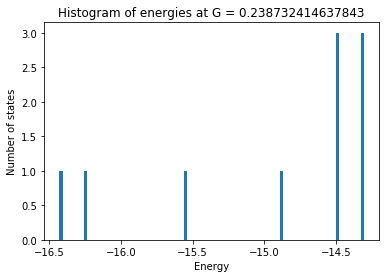

In [16]:
dim_h = basis.Ns
print('Dimension of the Hilbert space:')
print(dim_h)

if dim_h > 4000:
    exact_energies, exact_states = H.eigsh(k=10, which='SA') # k is number of states to find, SA means find the smallest algabraic eigenvalues
else:
    exact_energies, exact_states = H.eigh() # Full diagonalization of a Hermitian matrix
    
# Creating a histogram of the energies
plt.hist(exact_energies, bins=dim_h//50)
plt.xlabel('Energy')
plt.ylabel('Number of states')
plt.title('Histogram of energies at G = {}'.format(G_final))
plt.show()

Let's compare the ground state energy from ED to the final ground state energy from the RG equations:

In [17]:
print('ED ground state energy')
print(exact_energies[0]) 

print('RG ground state energy')
print(output_df['energy'].iloc[-1])

print('Difference')
print(exact_energies[0] - output_df['energy'].iloc[-1])

ED ground state energy
-16.42710279223323
RG ground state energy
-16.427102792232443
Difference
-7.887024366937112e-13


Now let's plot the difference between energies at various couplings.

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


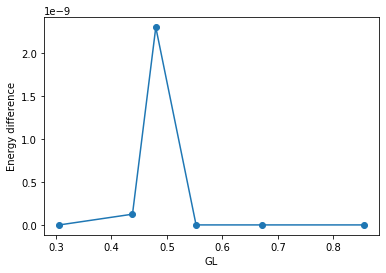

In [18]:
diffs = []
divisible_Gs = []
for i, G in enumerate(Gs):
    if i%5 == 0: # Only using indices that are multiples of 15
        h = ham_op_2(L, G, k, basis=basis)
        e, v = h.eigsh(k=1, which = 'SA') # we only need the 0th energy
        diffs += [e[0] - output_df['energy'].iloc[i]]
        divisible_Gs += [G]
         
plt.plot(np.array(divisible_Gs)*L, diffs, marker='o')
plt.xlabel('GL')
plt.ylabel('Energy difference')
# plt.ylim(-10**-12, 10**-12)
plt.show()

If you chose $GL < 0$, you should have noticed a drop in accuracy around $GL = 1.5$. This coincides with
a loss of accuracy in the integrals of motion

In [19]:
iom_inds = ['R_{}'.format(i) for i in range(4)]
which_iom = int(input('Index of IOM to check: '))
ground_ioms = [] # Exp. value of the IOM operator in the ground state
rg_ioms = [] # IOM eigenvalues from RG. Should be the same as "lowest_ioms"
Gss = []
for i, G in enumerate(Gs):
    if i%10 == 0: # Only using indices that are multiples of 10
        g = G/(1-G*np.sum(k))
        h = ham_op_2(L, G, k, basis=basis)
        e, v = h.eigsh(k=1, which = 'SA') # we only need the 0th energy
        v0 = v[:,0]
        i_d = iom_dict(L, g, k, k1=which_iom)
        i_o = quantum_operator(i_d, basis=basis)
        Gss += [G]
        print(i_o.matrix_ele(v0, v0))
        print(output_df[iom_inds[which_iom]].iloc[i])
        ground_ioms += [i_o.matrix_ele(v0, v0)]
        rg_ioms += [output_df[iom_inds[which_iom]].iloc[i]]

Index of IOM to check: 2
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 6, 1
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
(0.5527654864906528-1.0408340855860843e-17j)
0.5527654864906533
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 6, 1
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
(0.8198752267730192-2.7755575615628914e-17j)
0.8198752267840803
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 6, 1
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
(0.955504548322967+8.326672684688674e-17j)
0.955504548322966
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 6, 1
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
(1.1124760477757958-8.3266

Now, let's plot these values.

/Users/wholdhus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


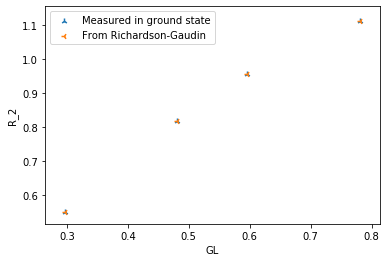

In [20]:
ground_ioms = np.array(ground_ioms)
rg_ioms = np.array(rg_ioms)
gss = np.array(Gss)*L
plt.scatter(gss, ground_ioms, label = 'Measured in ground state', marker = '2')
plt.scatter(gss, rg_ioms, label = 'From Richardson-Gaudin', marker='3')
plt.ylabel('R_{}'.format(which_iom))
plt.xlabel('GL')
plt.legend()

Strangely, if we form a Hamiltonian by just summing integrals of motion (which is equivalent to the Hamiltonian of study up to a constant that depend on $G$), we still agree!

In [ ]:
Gss = []
Ess_ed = []
Ess_rg = []
for i, G in enumerate(Gs):
    if i%10 == 0: # Only using indices that are multiples of 10
        g = G/(1-G*np.sum(k))
        for j in range(L):
            i_d = iom_dict(L, g, k, k1=j, mult=k[j]) # making operator k R_k
            i_o = quantum_operator(i_d, basis=basis)
            if j == 0:
                h = i_o # initializing Hamiltonian operator
            else:
                h += i_o # H = sum_k k R_k
        e, v = h.eigsh(k=1, which = 'SA')
        Ess_ed += [e[0]]
        Ess_rg += [np.sum(output_df[iom_inds].iloc[i] * k)]
        Gss += [G]
plt.figure(figsize=(8,8))
plt.scatter(np.array(Gss)*L, np.array(Ess_ed) - np.array(Ess_rg))
plt.xlabel('GL')
plt.ylabel('Energy difference')
plt.title('Difference in $\sum_k k R_k$')

Let's take a closer look at the plot:

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(np.array(Gss)*L, np.array(Ess_ed) - np.array(Ess_rg))
plt.xlabel('GL')
plt.ylabel('Energy difference')
plt.title('Difference in $\sum_k k R_k$')
plt.ylim(-10**-14, 10**-14)

So, this error doesn't come from us finding incorrect integrals of motion, it comes from the fact that the ground state of $\sum_k k R_k$ is no longer the ground state of the Hamiltonian with the additional ($G-dependent$) constant. This is because the Casimir operator, which also comes into play in that constant, has a different value for some excited states, ($-1$ instead of $3$, as will be seen below), and this induces those states to a lower energy as we increase $G$, causing a level crossing and 1st order phase transition!

## Phase transition in the repulsive case

There is an additional complication. If you happened to choose a repulsive coupling greater than $GL \approx 1.5$, you may have noticed a sudden drop in accuracy of the solutions. This appears to occur due to a change in the value of the Casimir operator
\begin{equation}
Q_k = \vec T_k^+ \cdot \vec T_{k'}^- + \vec T_k^- \cdot \vec T_k^+ + \vec S_k \cdot \vec S_k
+ \left(\frac{1}{2}N_k - 1\right)^2,
\end{equation}
as I will show after first demonstrating that there is an issue at this value of $GL$:

In [ ]:
Gss = np.linspace(-1.25, -1.75, 20)/L
Ess = np.zeros((20, 20))
vss = [] # I'm going to save the states so  I don't have to keep diagonalizing things
for i, G in enumerate(Gss):
    h = ham_op_2(L, G, k, basis=basis)
    e, v = h.eigsh(k=20, which = 'SA') # we only need the 0th energy
    Ess[i,:] = np.sort(e)
    vss += [v]
for i in range(10): # Only plotting the first 10 energies because it ends up neater
    plt.scatter(Gss*L, Ess[:,i])

This is even stranger! It looks like a number of different states are becoming degenerate at a coupling around $GL = 1.5$! Let's plot this as lines with the same color, since the ordering seems to be getting scrambled (which gives makes the colors more or less useless).

In [ ]:
for i in range(10):
    plt.plot(np.array(Gss)*L, Ess[:,i], color='black')

This happens along with a change in the Casimir operator!

In [ ]:
casimirs = np.zeros((20, 4))
# Forming a list of Casimir operators.
cdicts = [casimir_dict(4, i, 1.) for i in range(4)]
cops = [quantum_operator(cdicts[i], basis=basis) for i in range(4)]

for i, G in enumerate(Gss):
    # h = ham_op_2(L, G, k, basis=basis)
    # e, v = h.eigsh(k=1, which='SA') # Let's only deal with the ground state for now
    v0 = vss[i][:,0] # vss is a list of matrices, the columns of the matrices are the wavefunctions
    for j in range(4):
        casimirs[i, j] = cops[j].matrix_ele(v0, v0)
for j in range(4):
    plt.plot(Gss*L, casimirs[:, j], label = ('Q_{}'.format(j)), marker=markers[j])
plt.legend()

I'm not sure how to account for these changes. What if we stop dealing with the diagonal element in the Hamiltonian? Then, we could just define a Hamiltonian that doesn't have to have this additional constant. This won't change the attractive-coupling physics, since in that case the ground state wavefunction is unaffected (though the energy will be different).